In [1]:
import numpy as np
from utils import ZeroDFullydynamic,ZeroDQuasidynamic,advance,solve
import matplotlib.pyplot as plt


In [14]:
Tmax=300
cs=3000
vpl=1e-5
G=2e9
sigma=5e6
a=0.01
b=0.015
drs=1e-5
v0=1.01
theta0=drs/vpl
u0=np.array([v0,theta0])
problem=ZeroDQuasidynamic(Tmax,u0,a,b,sigma,drs,G,cs,vpl)

In [15]:
u0

array([1.01, 1.  ])

In [16]:
t=0
u=u0.reshape(1,2)
i=1
dt_const=1e-6
T=np.array([0]).reshape(1,1)
while T[-1]<Tmax:
    dt=dt_const/u[-1,0]
    T=np.append(T,(T[-1,0]+dt).reshape(1,1),axis=0)
    u_new=advance(dt,u[-1,:],problem.RHS)
    u=np.append(u,u_new,axis=0)

In [17]:
u

array([[1.01000000e+00, 1.00000000e+00],
       [1.02448225e+00, 9.04191697e-01],
       [1.03898940e+00, 8.17569953e-01],
       ...,
       [3.43140482e-07, 7.29848196e+00],
       [7.60538513e-07, 8.96668352e+00],
       [1.18910661e-06, 9.14059126e+00]])

(-15.036929427949984, 150.0)

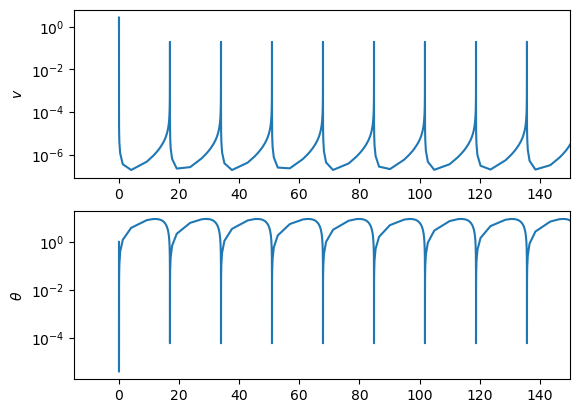

In [18]:
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.plot(T,u[:,0])
ax1.set_ylabel(r'$v$')
ax1.set_yscale('log')
ax2.plot(T,u[:,1])
ax2.set_ylabel(r'$\theta$')
ax2.set_yscale('log')

ax2.set_xlim(right=150)
ax1.set_xlim(right=150)

Text(0, 0.5, '$\\theta$')

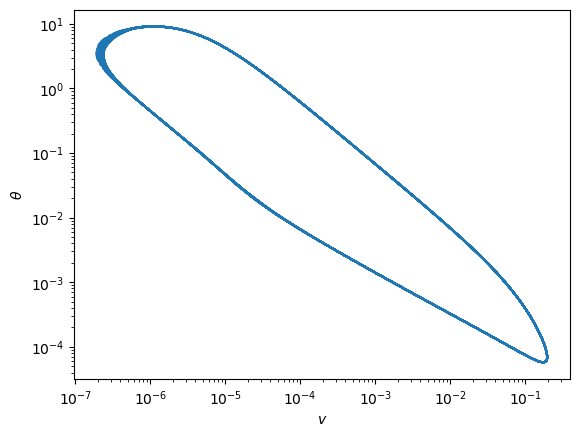

In [19]:
fig, (ax1)=plt.subplots(1,1)
ax1.plot(u[1000:,0],u[1000:,1])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$v$')
ax1.set_ylabel(r'$\theta$')

(50.0, 315.77551798694964)

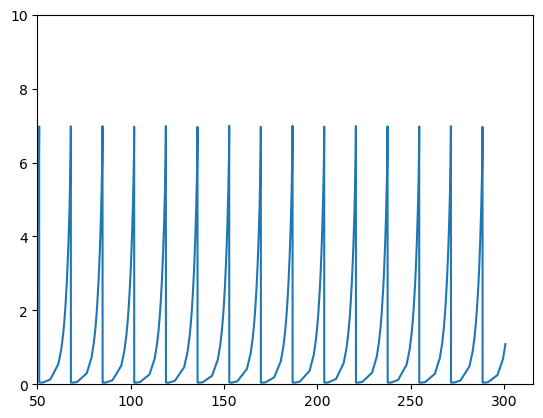

In [33]:

plt.plot(T,u[:,0]*u[:,1]/drs)
plt.ylim(0,10)
plt.xlim(left=50)

In [21]:
drs

1e-05

In [35]:
vpl

1e-05